<a href="https://colab.research.google.com/github/Charlez42/proyecto-final-hc-carlos-fuentes/blob/main/TRABAJO_FINAL_HC_PIEZAS_CER%C3%81MICAS_%C3%9Altimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***PASO 1*** Descargar el conjunto de datos desde Google Drive

In [ ]:
import gdown

# ENLACE DE GOOGLE DRIVE (MODIFICADO PARA DESCARGA DIRECTA)

url = 'https://drive.google.com/uc?id=1dLpnPAH3cdPJrThsXqLLu9D1FFjk5TsJ'
output = 'PIEZAS_CERAMICAS_MUSEO.csv'
gdown.download(url, output, quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1dLpnPAH3cdPJrThsXqLLu9D1FFjk5TsJ
To: /content/PIEZAS_CERAMICAS_MUSEO.csv
100%|██████████| 859k/859k [00:00<00:00, 32.4MB/s]


'PIEZAS_CERAMICAS_MUSEO.csv'

# ***PASO 2*** Cargar el Conjunto de Datos, el archivo csv se carga a una variable para ser manejado como dataframe

In [ ]:
import pandas as pd

original_df = pd.read_csv('PIEZAS_CERAMICAS_MUSEO.csv')
print(original_df.columns)

Index(['id', 'Código', 'Fecha de Procedencia', 'Tipo de bien',
       'Tipo de Material', 'Proveniencia', 'Sector', 'Cuadrante', 'Área', 'UE',
       'Unidad (FA)', 'Unidad', 'Capa', 'Nivel', 'Coordenadas',
       'Tipo de Contexto', 'Denominación de Contexto', 'Fecha de excavación',
       'Excavador', 'Contexto', 'Códigos Previos', 'Código Registro Nacional',
       'Nro Ingreso', 'Tipo de Objeto', 'Cultura', 'Periodo',
       'Técnica de Manufactura', 'Técnica de Decoración', 'Descripción',
       'Descripción Decoración', 'Alto', 'Largo', 'Ancho', 'Espesor',
       'Diámetro máximo', 'Diámetro mínimo', 'Diámetro base', 'Peso', 'Sala',
       'Vitrina', 'Depósito', 'Estante', 'Balda', 'Nro Caja',
       'Observación Final', 'Estado de Integridad', 'Estado de Conservación',
       'Inventariador', 'Fecha de Inventario', 'Catalogador Previo',
       'Fecha Catalogador Previo', 'Revisado'],
      dtype='object')


# ***PASO 3*** Limpiar los Datos

In [ ]:
# CREAREMOS UNA LISTA CON LAS COLUMNAS MENOS IMPORTANTES, LAS CUALES SERÁN USADAS PARA SABER QUÉ COLUMNAS ELIMINAR EN EL DATAFRAME

columns_less_important = ['id', 'Fecha de Procedencia', 'Tipo de bien', 'Cuadrante', 'Área', 'UE',
                         'Unidad (FA)', 'Unidad', 'Capa', 'Nivel', 'Tipo de Contexto', 'Códigos Previos',
                         'Contexto', 'Código Registro Nacional', 'Nro Ingreso', 'Observación Final',
                         'Catalogador Previo', 'Fecha Catalogador Previo', 'Revisado']



In [ ]:
# CON ESTE CODIGO REMOVEREMOS DEL DATAFRAME LAS COLUMNAS PREVIAMENTE DECLARADAS COMO MENOS IMPORTANTES
# Y NOS QUEDAMOS CON LAS QUE SÍ CONSIDERAMOS PERTINENTES PARA EL ANÁLISIS

df = original_df.drop(columns=columns_less_important)
print(df.columns)

Index(['Código', 'Tipo de Material', 'Proveniencia', 'Sector', 'Coordenadas',
       'Denominación de Contexto', 'Fecha de excavación', 'Excavador',
       'Tipo de Objeto', 'Cultura', 'Periodo', 'Técnica de Manufactura',
       'Técnica de Decoración', 'Descripción', 'Descripción Decoración',
       'Alto', 'Largo', 'Ancho', 'Espesor', 'Diámetro máximo',
       'Diámetro mínimo', 'Diámetro base', 'Peso', 'Sala', 'Vitrina',
       'Depósito', 'Estante', 'Balda', 'Nro Caja', 'Estado de Integridad',
       'Estado de Conservación', 'Inventariador', 'Fecha de Inventario'],
      dtype='object')


In [ ]:
# ESTOS ELEMENTOS QUEDAN LUEGO DEL PRIMER FILTRADO
df.shape

(1176, 33)

# ***PASO 4*** Exploración visual (EDA) de los datos




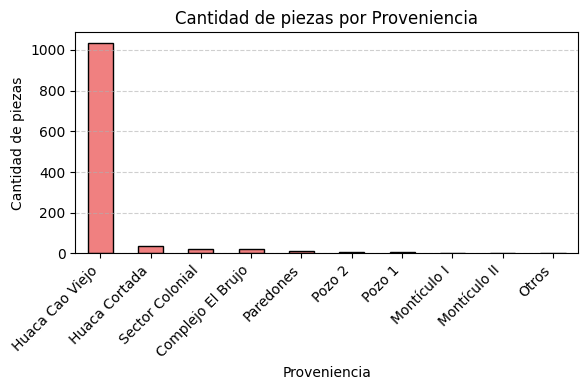

In [ ]:
import matplotlib.pyplot as plt

piezas_por_origen = df['Proveniencia'].value_counts()

# CREAMOS LA GRÁFICA

plt.figure(figsize=(6, 4))
piezas_por_origen.plot(kind='bar', color='lightcoral', edgecolor='black')

# LE OTORGAMOS ESTILO

plt.title('Cantidad de piezas por Proveniencia')
plt.xlabel('Proveniencia')
plt.ylabel('Cantidad de piezas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

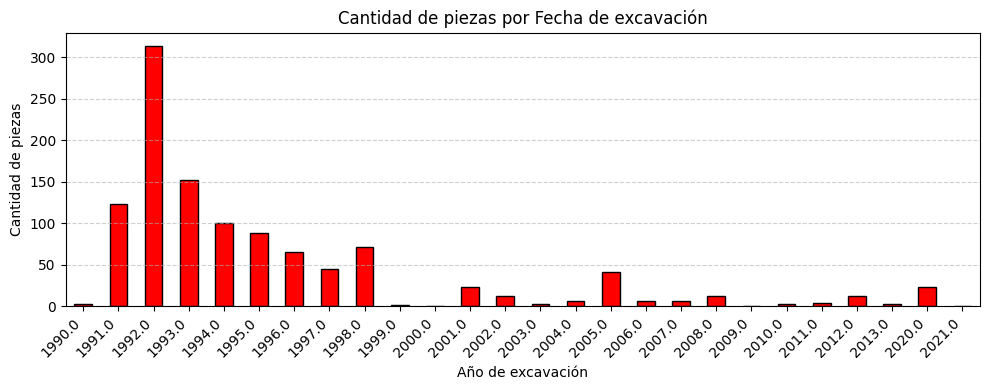

In [ ]:
import matplotlib.pyplot as plt

# EXTRAEMOS EL AÑO DE LA FECHA

df['Fecha de excavación'] = pd.to_datetime(df['Fecha de excavación'], errors='coerce')

# ASEGURAMOS QUE LA COLUMNA SEA TIPO FECHA

df['Año de excavación'] = df['Fecha de excavación'].dt.year
piezas_por_año = df['Año de excavación'].value_counts().sort_index()

# CREAMOS LA GRÁFICA

plt.figure(figsize=(10, 4))
piezas_por_año.plot(kind='bar', color='red', edgecolor='black')

# LE OTORGAMOS ESTILO

plt.title('Cantidad de piezas por Fecha de excavación')
plt.xlabel('Año de excavación')
plt.ylabel('Cantidad de piezas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# ***PASO 5*** Ajustamos los datos faltantes y filtramos por año




In [ ]:
# REEMPLAZAMOS VALORES FALTANTES: "DESCONOCIDO" EN VACÍOS

df['Proveniencia'] = df['Proveniencia'].fillna('desconocido')
df['Fecha de excavación'] = pd.to_datetime(df['Fecha de excavación'], errors='coerce')
df['Año de excavación'] = df['Fecha de excavación'].dt.year

# REVISANDO LAS GRÁFICAS ANTERIORES, DEDICIMOS HACER UN ANÁLISIS SOLO DE LOS AÑOS DONDE HAY MÁS PIEZAS (1991, 1992 Y 1993)

df = df[df['Año de excavación'].isin([1991, 1992, 1993])]

In [ ]:
df.shape

(590, 34)

# ***PASO 6*** ELECCIÓN DE LAS VARIABLES A TRABAJAR (TIPO DE OBJETO, TÉCNICA DE MANUFACTURA Y TÉCNICA DE DECORACIÓN)

In [ ]:
# LA LISTA COLUMNS_TO_WORK REPRESANTA EL NOMBRE DE LAS COLUMNAS CON LAS QUE SE TRABAJARÁ LAS AGRUPACIONES

columns_to_work = ['Tipo de Objeto', 'Técnica de Manufactura', 'Técnica de Decoración']

# IMPORTANTE: ESTA ELECCIÓN (LA DE ARRIBA) ES YA PARTE DIRECCIONADA POR EL ESPECIALISTA PARA EL ANÁLISIS

# EL SIGUIENTE CÓDIGO, CONTABILIZA CUÁNTOS ELEMENTOS EXISTEN POR CADA VARIABLE

for column in columns_to_work:
  actual_count = df[column].value_counts(dropna=False)
  print("-----------")
  print(actual_count)


-----------
Tipo de Objeto
Olla         127
Plato         99
Botella       94
Cántaro       89
Miniatura     42
Escultura     32
Piruro        30
Jarra         30
Silbato       24
Fragmento      5
Ocarina        4
Cuenco         4
Colgante       4
Canchero       2
Cuenta         1
Paleta         1
Trompeta       1
Tobera         1
Name: count, dtype: int64
-----------
Técnica de Manufactura
Modelado              482
Modelado, Moldeado     49
Moldeado               42
Moldeado, Modelado     13
NaN                     4
Name: count, dtype: int64
-----------
Técnica de Decoración
NaN                                                                                               179
Estampado                                                                                          98
Aplicación                                                                                         19
Inciso                                                                                             18
Pintarra

# ***PASO 7*** Ajustamos la información de "Tipo de Objeto"

In [ ]:
# DESPUÉS DE OBSEVAR EL DATAFRAME, Y DEBIDO A UNA GRAN CANTIDAD DE ELEMENTOS POCO RECURRENTES, SE OPTA POR TRABAJAR SOLO CON: OLLA, PLATO, BOTELLA, CÁNTARO, MINIATURA, ESCULTURA, JARRA Y SILBATO

objects_to_filter = ["Olla","Plato","Botella","Cántaro","Miniatura","Escultura","Piruro","Jarra","Silbato"]
filtered_df= df[df['Tipo de Objeto'].isin(objects_to_filter)]

# OBSERVAMOS AHORA CÓMO QUEDAN LOS NUEVOS DATOS
for column in columns_to_work:
  actual_count = filtered_df[column].value_counts(dropna=False)
  print("-----------")
  print(actual_count)

-----------
Tipo de Objeto
Olla         127
Plato         99
Botella       94
Cántaro       89
Miniatura     42
Escultura     32
Piruro        30
Jarra         30
Silbato       24
Name: count, dtype: int64
-----------
Técnica de Manufactura
Modelado              459
Modelado, Moldeado     49
Moldeado               42
Moldeado, Modelado     13
NaN                     4
Name: count, dtype: int64
-----------
Técnica de Decoración
NaN                                                                                               171
Estampado                                                                                          98
Aplicación                                                                                         19
Inciso                                                                                             17
Pintarrajeado                                                                                      12
Pintura positiva                                           

# ***PASO 8*** Ajustamos la información de "Tipo de Manufactura"

In [ ]:
# ELIMINAREMOS LOS NAN DE "TÉCNICA DE MANUFACTURA" DEBIDO A QUE TODOS DEBERIAN TENER UNA

filtered_df = filtered_df.dropna(subset=['Técnica de Manufactura'])

# EN CUANTO A LA COLUMNA "TÉCNICA DE MANUFACTURA", IGUALAMOS LOS VALORES DE "MODELADO, MOLDEADO" CON "MOLDEADO, MODELADO" PARA QUE NO SE CONTABILICEN DE FORMA DIFERENTE

filtered_df.loc[filtered_df['Técnica de Manufactura'] == 'Modelado, Moldeado', 'Técnica de Manufactura'] = 'Moldeado, Modelado'

# OBSERVAMOS, NUEVAMENTE, CÓMO QUEDAN LOS DATOS

for column in columns_to_work:
  actual_count = filtered_df[column].value_counts(dropna=False)
  print("-----------")
  print(actual_count)

-----------
Tipo de Objeto
Olla         126
Plato         99
Botella       94
Cántaro       88
Miniatura     42
Escultura     31
Piruro        30
Jarra         30
Silbato       23
Name: count, dtype: int64
-----------
Técnica de Manufactura
Modelado              459
Moldeado, Modelado     62
Moldeado               42
Name: count, dtype: int64
-----------
Técnica de Decoración
NaN                                                                                               169
Estampado                                                                                          98
Aplicación                                                                                         18
Inciso                                                                                             17
Pintarrajeado                                                                                      12
Pintura positiva                                                                                   11
Impresión

# ***PASO 9*** Ajustamos la información en "Tipo de Decoración"

In [ ]:
# LOS NAN EN "TÉCNICA DE DECORACIÓN" LOS CAMBIAMOS A "SIN DECORACIÓN"

filtered_df['Técnica de Decoración'] = df['Técnica de Decoración'].fillna('Sin decoracion')

# QUIERO QUE SE MUESTREN LOS PUNTOS SUSPENSIVOS DE LA "TÉCNICA DE DECORACIÓN"

pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', None)  # Evita saltos de línea automáticos
pd.set_option('display.max_colwidth', None)  # Muestra columnas con textos largos completos

# OBSERVAMOS, DE NUEVO, CÓMO ESTÁN LOS DATOS

for column in columns_to_work:
  actual_count = filtered_df[column].value_counts(dropna=False)
  print("-----------")
  print(actual_count)

-----------
Tipo de Objeto
Olla         126
Plato         99
Botella       94
Cántaro       88
Miniatura     42
Escultura     31
Piruro        30
Jarra         30
Silbato       23
Name: count, dtype: int64
-----------
Técnica de Manufactura
Modelado              459
Moldeado, Modelado     62
Moldeado               42
Name: count, dtype: int64
-----------
Técnica de Decoración
Sin decoracion                                                                                    169
Estampado                                                                                          98
Aplicación                                                                                         18
Inciso                                                                                             17
Pintarrajeado                                                                                      12
Pintura positiva                                                                                   11
Impresión

# LA IDEA INICIAL, QUE ERA ANALIZAR LAS VARIABLES TIPO DE OBJETO, TÉCNICA DE MANUFACTURA, TÉCNICA DE DECORACIÓN, QUEDÓ RELEGEADA DADO QUE LA INFORMACIÓN SE ENCUENTRA MAL ESTRUCTURADA Y NECESITA UNA LIMPIEZA DE DATOS MÁS PROFUNDA, ASÍ COMO UNA CORRECCIÓN DE MUCHOS DATOS SUCIOS, POR LO QUE, CON LA INTENCIÓN DE NO MODIFICAR MUCHO EL ANÁLISIS, SE PROCEDERÁ A INTERVENIR LAS SIGUIENTES VARIABLES: TIPO DE OBJETO, TÉCNICA DE MANUFACTURA Y ESTADO DE INTEGRIDAD



# ***PASO 10*** Agregar nueva variable: Estado de Integridad

In [ ]:
# PROBAREMOS CON UNA NUEVA COLUMNA 'ESTADO DE INTEGRIDAD', PARA ELLLO SEGUIMOS USANDO DF

columns_to_work = ['Tipo de Objeto', 'Técnica de Manufactura', 'Estado de Integridad']

# EL SIGUIENTE CÓDIGO, CONTABILIZA LAS CANTIDADAS INGRESADAS EN CADA VARIABLE

for column in columns_to_work:
  actual_count = filtered_df[column].value_counts(dropna=False)
  print("-----------")
  print(actual_count)

-----------
Tipo de Objeto
Olla         126
Plato         99
Botella       94
Cántaro       88
Miniatura     42
Escultura     31
Piruro        30
Jarra         30
Silbato       23
Name: count, dtype: int64
-----------
Técnica de Manufactura
Modelado              459
Moldeado, Modelado     62
Moldeado               42
Name: count, dtype: int64
-----------
Estado de Integridad
1    356
2    176
3     27
0      4
Name: count, dtype: int64


# ***PASO 11*** Afinar información del diccionario

In [ ]:
# DEL DICCIONARIO DE DATOS DESCARGADO DE LA "PLATAFORMA DE GESTIÓN DE COLECCIONES", SE EXTRAE QUE LOS NÚMEROS MOSTRADOS EN ESTADO DE INTEGRIDAD CORRESPONDEN A:
# 0: Inconsistente
# 1: Completo
# 2: Incompleto
# 3: Fragmento
# NOS CORRESPONDE NOMBRAR UN NUEVO DATAFRAME

new_filter_df = filtered_df.copy()

# REEMPLAZAMOS LOS VALORES MENCIONADOS EN EL NUEVO DF

new_filter_df.loc[new_filter_df['Estado de Integridad'] == 0, 'Estado de Integridad'] = 'Inconsistente'
new_filter_df.loc[new_filter_df['Estado de Integridad'] == 1, 'Estado de Integridad'] = 'Completo'
new_filter_df.loc[new_filter_df['Estado de Integridad'] == 2, 'Estado de Integridad'] = 'Incompleto'
new_filter_df.loc[new_filter_df['Estado de Integridad'] == 3, 'Estado de Integridad'] = 'Fragmento'

# CONTABILIZAMOS

for column in columns_to_work:
  actual_count = new_filter_df[column].value_counts(dropna=False)
  print("-----------")
  print(actual_count)


-----------
Tipo de Objeto
Olla         126
Plato         99
Botella       94
Cántaro       88
Miniatura     42
Escultura     31
Piruro        30
Jarra         30
Silbato       23
Name: count, dtype: int64
-----------
Técnica de Manufactura
Modelado              459
Moldeado, Modelado     62
Moldeado               42
Name: count, dtype: int64
-----------
Estado de Integridad
Completo         356
Incompleto       176
Fragmento         27
Inconsistente      4
Name: count, dtype: int64


<ipython-input-78-868a82e6b06d>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Inconsistente' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_filter_df.loc[new_filter_df['Estado de Integridad'] == 0, 'Estado de Integridad'] = 'Inconsistente'


In [ ]:
# ELIMINAMOS EL CORRESPONDIENTE A INCONSISTENTE

new_filter_df = new_filter_df[new_filter_df['Estado de Integridad'] != 'Inconsistente']
for column in columns_to_work:
  actual_count = new_filter_df[column].value_counts(dropna=False)
  print("-----------")
  print(actual_count)

-----------
Tipo de Objeto
Olla         126
Plato         97
Botella       94
Cántaro       88
Miniatura     42
Escultura     30
Piruro        30
Jarra         30
Silbato       22
Name: count, dtype: int64
-----------
Técnica de Manufactura
Modelado              455
Moldeado, Modelado     62
Moldeado               42
Name: count, dtype: int64
-----------
Estado de Integridad
Completo      356
Incompleto    176
Fragmento      27
Name: count, dtype: int64


Aplicamos DBSCAN a new_filter_df


# ***PASO 12*** Visualizar toda información de las piezas a trabajar (cinco primeros registros)

In [ ]:
# VISUALIZAMOS LA INFORMACIÓN COMPLETA DE LOS CINCO PRIMEROS REGISTROS DE PIEZAS

new_filter_df.head()

,Código,Tipo de Material,Proveniencia,Sector,Coordenadas,Denominación de Contexto,Fecha de excavación,Excavador,Tipo de Objeto,Cultura,Periodo,Técnica de Manufactura,Técnica de Decoración,Descripción,Descripción Decoración,Alto,Largo,Ancho,Espesor,Diámetro máximo,Diámetro mínimo,Diámetro base,Peso,Sala,Vitrina,Depósito,Estante,Balda,Nro Caja,Estado de Integridad,Estado de Conservación,Inventariador,Fecha de Inventario,Año de excavación
0,EBBCE00000-1152,Cerámica,Huaca Cao Viejo,Frontis Norte,S:66.27 E:85.25,Entierro 60,1992-07-18,JPG/JMG,Miniatura,Lambayeque,Intermedio Tardío (900-1476 NE),Moldeado,Pintura fugitiva,"Miniatura de olla, de labio redondeado, borde y cuello evertido, cuerpo globular, asas apéndices con orificios y base ligeramente plana. La pieza cuenta con decoración pictórica a modo de bandas de color negro ubicados en el cuello y cuerpo, así mismo, las asas presentan una soguilla que las atraviesan. Su técnica de manufactura es moldeada, cocción oxidante y acabado bruñido.",NaN,37,0,0,3.0,31,13.0,12,20.7,NaN,NaN,2.0,9.0,1.0,339.0,Completo,1,Rosas Jiménez,10/14/2022 6:27:18 PM,1992.0
41,EBBCE00000-1134,Cerámica,Huaca Cao Viejo,Frontis Norte,S:65-66 E:91-92,NaN,1991-07-10,JMG,Piruro,Lambayeque,Intermedio Tardío (900-1476 NE),Modelado,Inciso,"Piruro de cuerpo bicónico. La parte inferior del cuerpo presenta decoración incisa compuesta por figuras triangulares con motivos lineales en su interior, intercaladas con líneas incisas oblicuas. Técnica de manufactura modelado, cocción oxidante y acabado pulido.",NaN,16,0,0,0.0,21,4.0,0,4.0,NaN,NaN,2.0,8.0,3.0,311.0,Completo,1,Albornoz,2/6/2021 3:12:26 PM,1991.0
128,EBBCE00000-1047,Cerámica,Huaca Cao Viejo,Frontis Norte,S:63.80-67 E:75-80,NaN,1992-03-27,EAT,Miniatura,Lambayeque,Intermedio Tardío (900-1476 NE),Modelado,Sin decoracion,"Miniatura de olla, de labio redondeado, cuello recto, cuerpo esférico, asas apéndices laterales y base convexa. Su técnica de manufactura es modelada, presenta cocción oxidante y acabado alisado.",NaN,29,34,0,5.0,24,16.0,80,10.0,NaN,NaN,2.0,9.0,1.0,339.0,Incompleto,3,Fuentes Romero,12/14/2020 8:06:17 PM,1992.0
130,EBBCE00000-1045,Cerámica,Huaca Cao Viejo,"Plaza, Lateral Este",S:40-43 E:120-122,NaN,1993-08-10,MSC,Miniatura,Lambayeque,Intermedio Tardío (900-1476 NE),Modelado,Sin decoracion,"Miniatura de sonajero, de cuerpo esférico y base semiplana, con orificio hacia una sección media superior del objeto. Su técnica de manufactura es modelada, cocción oxidante y acabado alisado.",NaN,51,0,0,0.0,41,12.0,12,31.0,NaN,NaN,2.0,9.0,1.0,339.0,Completo,1,Fuentes Romero,12/14/2020 7:59:32 PM,1993.0
133,EBBCE00000-1042,Cerámica,Huaca Cao Viejo,"Plaza, Lateral Este",S:42.53 E:123.96,Entierro 08,1993-09-10,MSC,Miniatura,Lambayeque,Intermedio Tardío (900-1476 NE),Modelado,"Pulido, Pintura fugitiva","Miniatura de olla, de labio plano, borde y cuello evertido, cuerpo globular, asas apéndices con orificios y base ligeramente convexa. La pieza cuenta con decoración pictórica diluida a modo de bandas de color negro ubicados en el cuello y cuerpo. Su técnica de manufactura es modelada, cocción oxidante y acabado pulido.",NaN,29,42,0,3.0,28,11.0,10,17.0,NaN,NaN,2.0,9.0,1.0,339.0,Completo,2,Fuentes Romero,12/14/2020 7:35:25 PM,1993.0


In [ ]:
# DEFINIMOS EL NUEVO DATAFRAME CON SOLO LAS COLUMNAS A TRABAJAR

final_filter_df = new_filter_df[columns_to_work]
final_filter_df.head()

,Tipo de Objeto,Técnica de Manufactura,Estado de Integridad
0,Miniatura,Moldeado,Completo
41,Piruro,Modelado,Completo
128,Miniatura,Modelado,Incompleto
130,Miniatura,Modelado,Completo
133,Miniatura,Modelado,Completo


In [ ]:
# APLICAMOS EL DUMMIES PARA TODAS LAS COLUMNAS DEL DATAFRAME

final_filter_df = pd.get_dummies(final_filter_df)
final_filter_df.head()

,Tipo de Objeto_Botella,Tipo de Objeto_Cántaro,Tipo de Objeto_Escultura,Tipo de Objeto_Jarra,Tipo de Objeto_Miniatura,Tipo de Objeto_Olla,Tipo de Objeto_Piruro,Tipo de Objeto_Plato,Tipo de Objeto_Silbato,Técnica de Manufactura_Modelado,Técnica de Manufactura_Moldeado,"Técnica de Manufactura_Moldeado, Modelado",Estado de Integridad_Completo,Estado de Integridad_Fragmento,Estado de Integridad_Incompleto
0,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
41,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False
128,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
130,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False
133,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False


# ***PASO 13*** Visualización del DBSCAN

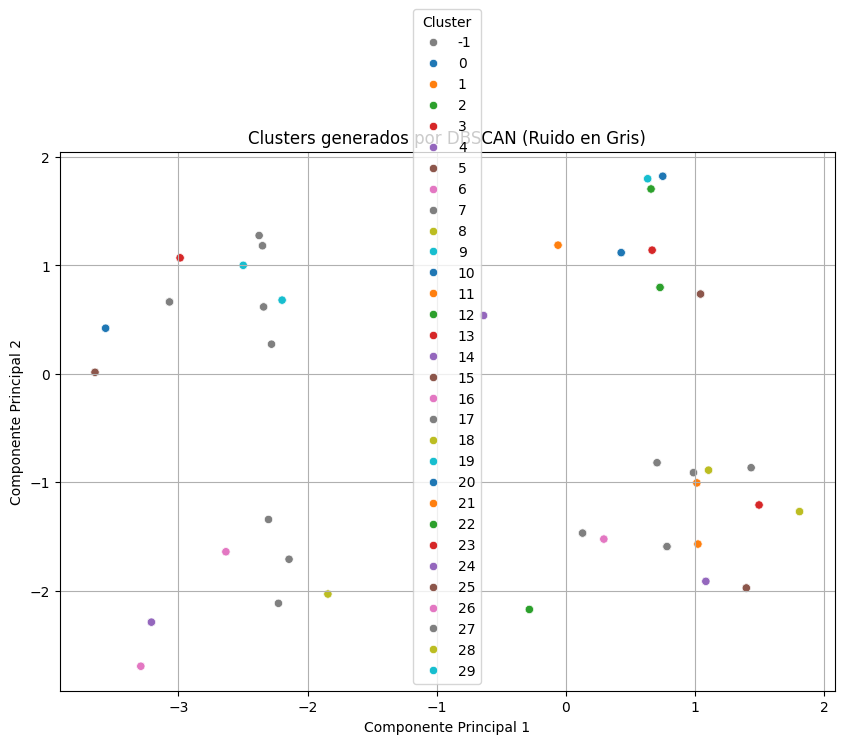

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns

# EL DATAFRAME CON EL QUE TRABAJAREMOS TODO EL DBSCAN SERA "DF_FINAL", EL CUAL YA ESTÁ FILTRADO

scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_filter_df)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
dbscan = DBSCAN(eps=1, min_samples=3)
clusters = dbscan.fit_predict(X_scaled)
df_viz = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_viz['Cluster'] = clusters

plt.figure(figsize=(10, 7))
unique_clusters = sorted(df_viz['Cluster'].unique())

num_clusters = len(unique_clusters)
if -1 in unique_clusters:

# SI HAY RUIDO, NECESITAS UN COLOR PARA EL RUIDO Y (NUM_CLUSTERS - 1) COLORES PARA LOS CLUSTERS REALES
# Usa una paleta para los clusters > -1

    colors_for_clusters = sns.color_palette('tab10', n_colors=num_clusters - 1)
    palette_map = {-1: 'gray'}
    for i, cluster_id in enumerate([c for c in unique_clusters if c != -1]):
        palette_map[cluster_id] = colors_for_clusters[i]
else:
    palette_map = sns.color_palette('tab10', n_colors=num_clusters)
    for i, cluster_id in enumerate(unique_clusters):
         palette_map[cluster_id] = palette_map[i]

# CREA EL SCATTERPLOT USANDO LA PALETA DEFINIDA

sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='Cluster', palette=palette_map, legend='full')

plt.title('Clusters generados por DBSCAN (Ruido en Gris)') # Título actualizado
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# ***PASO 14*** Información detallada de cada cluster

In [ ]:
resultado = df_viz.copy()
resultado['Cluster_DBSCAN'] = clusters
print("\nCantidad de piezas por clúster (ordenado por clúster):")
print(resultado['Cluster_DBSCAN'].value_counts().sort_index())


Cantidad de piezas por clúster (ordenado por clúster):
Cluster_DBSCAN
-1     14
 0     27
 1      6
 2     34
 3     19
 4     43
 5     35
 6     20
 7      8
 8      3
 9     19
 10    17
 11    36
 12    63
 13     7
 14     5
 15    50
 16     5
 17     5
 18     5
 19     7
 20    17
 21     9
 22    20
 23    18
 24    19
 25    16
 26    13
 27     4
 28    12
 29     3
Name: count, dtype: int64


In [ ]:
# FILTRANDO LOS CLUSTERES

cluster_characteristics = final_filter_df.groupby(clusters).mean()

# LEER DICHA RECURRENCIA

print("Características promedio de cada clúster:")
print(cluster_characteristics)


Características promedio de cada clúster:
     Tipo de Objeto_Botella  Tipo de Objeto_Cántaro  Tipo de Objeto_Escultura  \
-1                      0.0                0.214286                  0.142857   
 0                      0.0                0.000000                  0.000000   
 1                      0.0                0.000000                  0.000000   
 2                      0.0                0.000000                  0.000000   
 3                      0.0                1.000000                  0.000000   
 4                      0.0                0.000000                  0.000000   
 5                      0.0                0.000000                  0.000000   
 6                      0.0                1.000000                  0.000000   
 7                      0.0                0.000000                  1.000000   
 8                      0.0                0.000000                  0.000000   
 9                      0.0                0.000000                

# ***PASO 15*** Corroboramos información de la plataforma de colecciones

In [ ]:
# VAMOS A OBSERVAR LOS OBJETOS DEL CLUSTER 26, QUE SON BOTELLA, MOLDEADA E INCOMPLETA
# AHORA, LISTAMOS LOS INDICES DE LOS ELEMENTOS PRESENTES EN ESE DATAFRAME

print(resultado[resultado['Cluster_DBSCAN'] == 26].index.tolist())

[208, 280, 290, 338, 372, 373, 381, 385, 390, 405, 426, 484, 556]


In [ ]:
# POR EL ÍNDICE, BUSCAMOS SU CÓDIGO HACIENDO ANALOGIA CON EL DATAFRAME QUE AUN CONSRVA LA COLUMNA ID, TOMAMOS EL EJEMPLO 381

new_filter_df.iloc[381]


,761
Código,EBBCE00000-414
Tipo de Material,Cerámica
Proveniencia,Huaca Cao Viejo
Sector,Frontis Norte
Coordenadas,S:67-68 E:94-95
Denominación de Contexto,Entierro 89
Fecha de excavación,1991-08-20 00:00:00
Excavador,VHRC
Tipo de Objeto,Botella
Cultura,Lambayeque


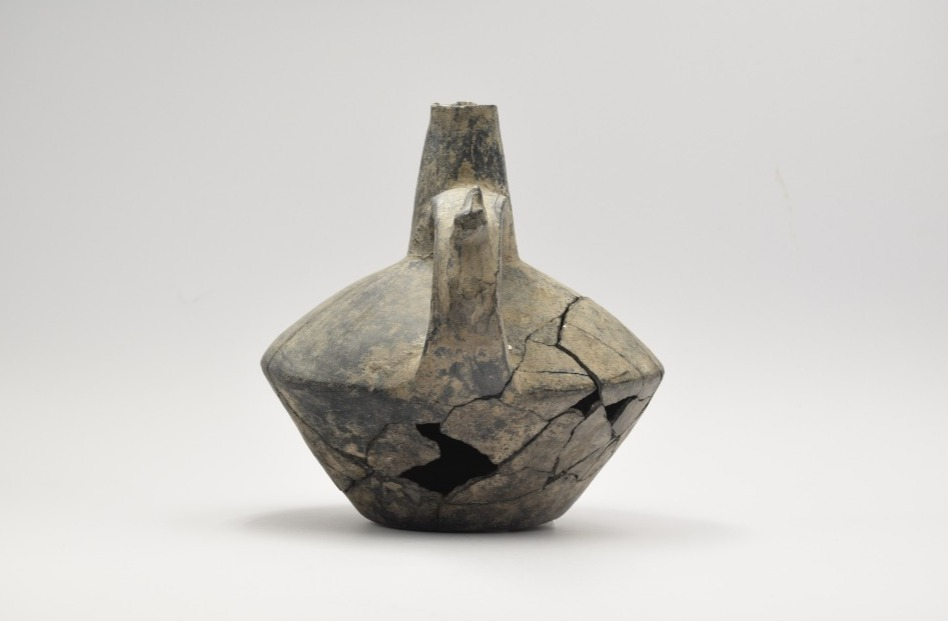

In [108]:
# BUSCAMOS OTRO CÓDIGO HACIENDO ANALOGÍA CON EL DATAFRAME QUE AUN CONSRVA LA COLUMNA ID, TOMAMOS EL EJEMPLO 280
new_filter_df.iloc[280]

,610
Código,EBBCE00000-565
Tipo de Material,Cerámica
Proveniencia,Huaca Cao Viejo
Sector,Frontis Norte
Coordenadas,S:63-65 E:82-85
Denominación de Contexto,NaN
Fecha de excavación,1992-03-13 00:00:00
Excavador,MSC
Tipo de Objeto,Botella
Cultura,Lambayeque


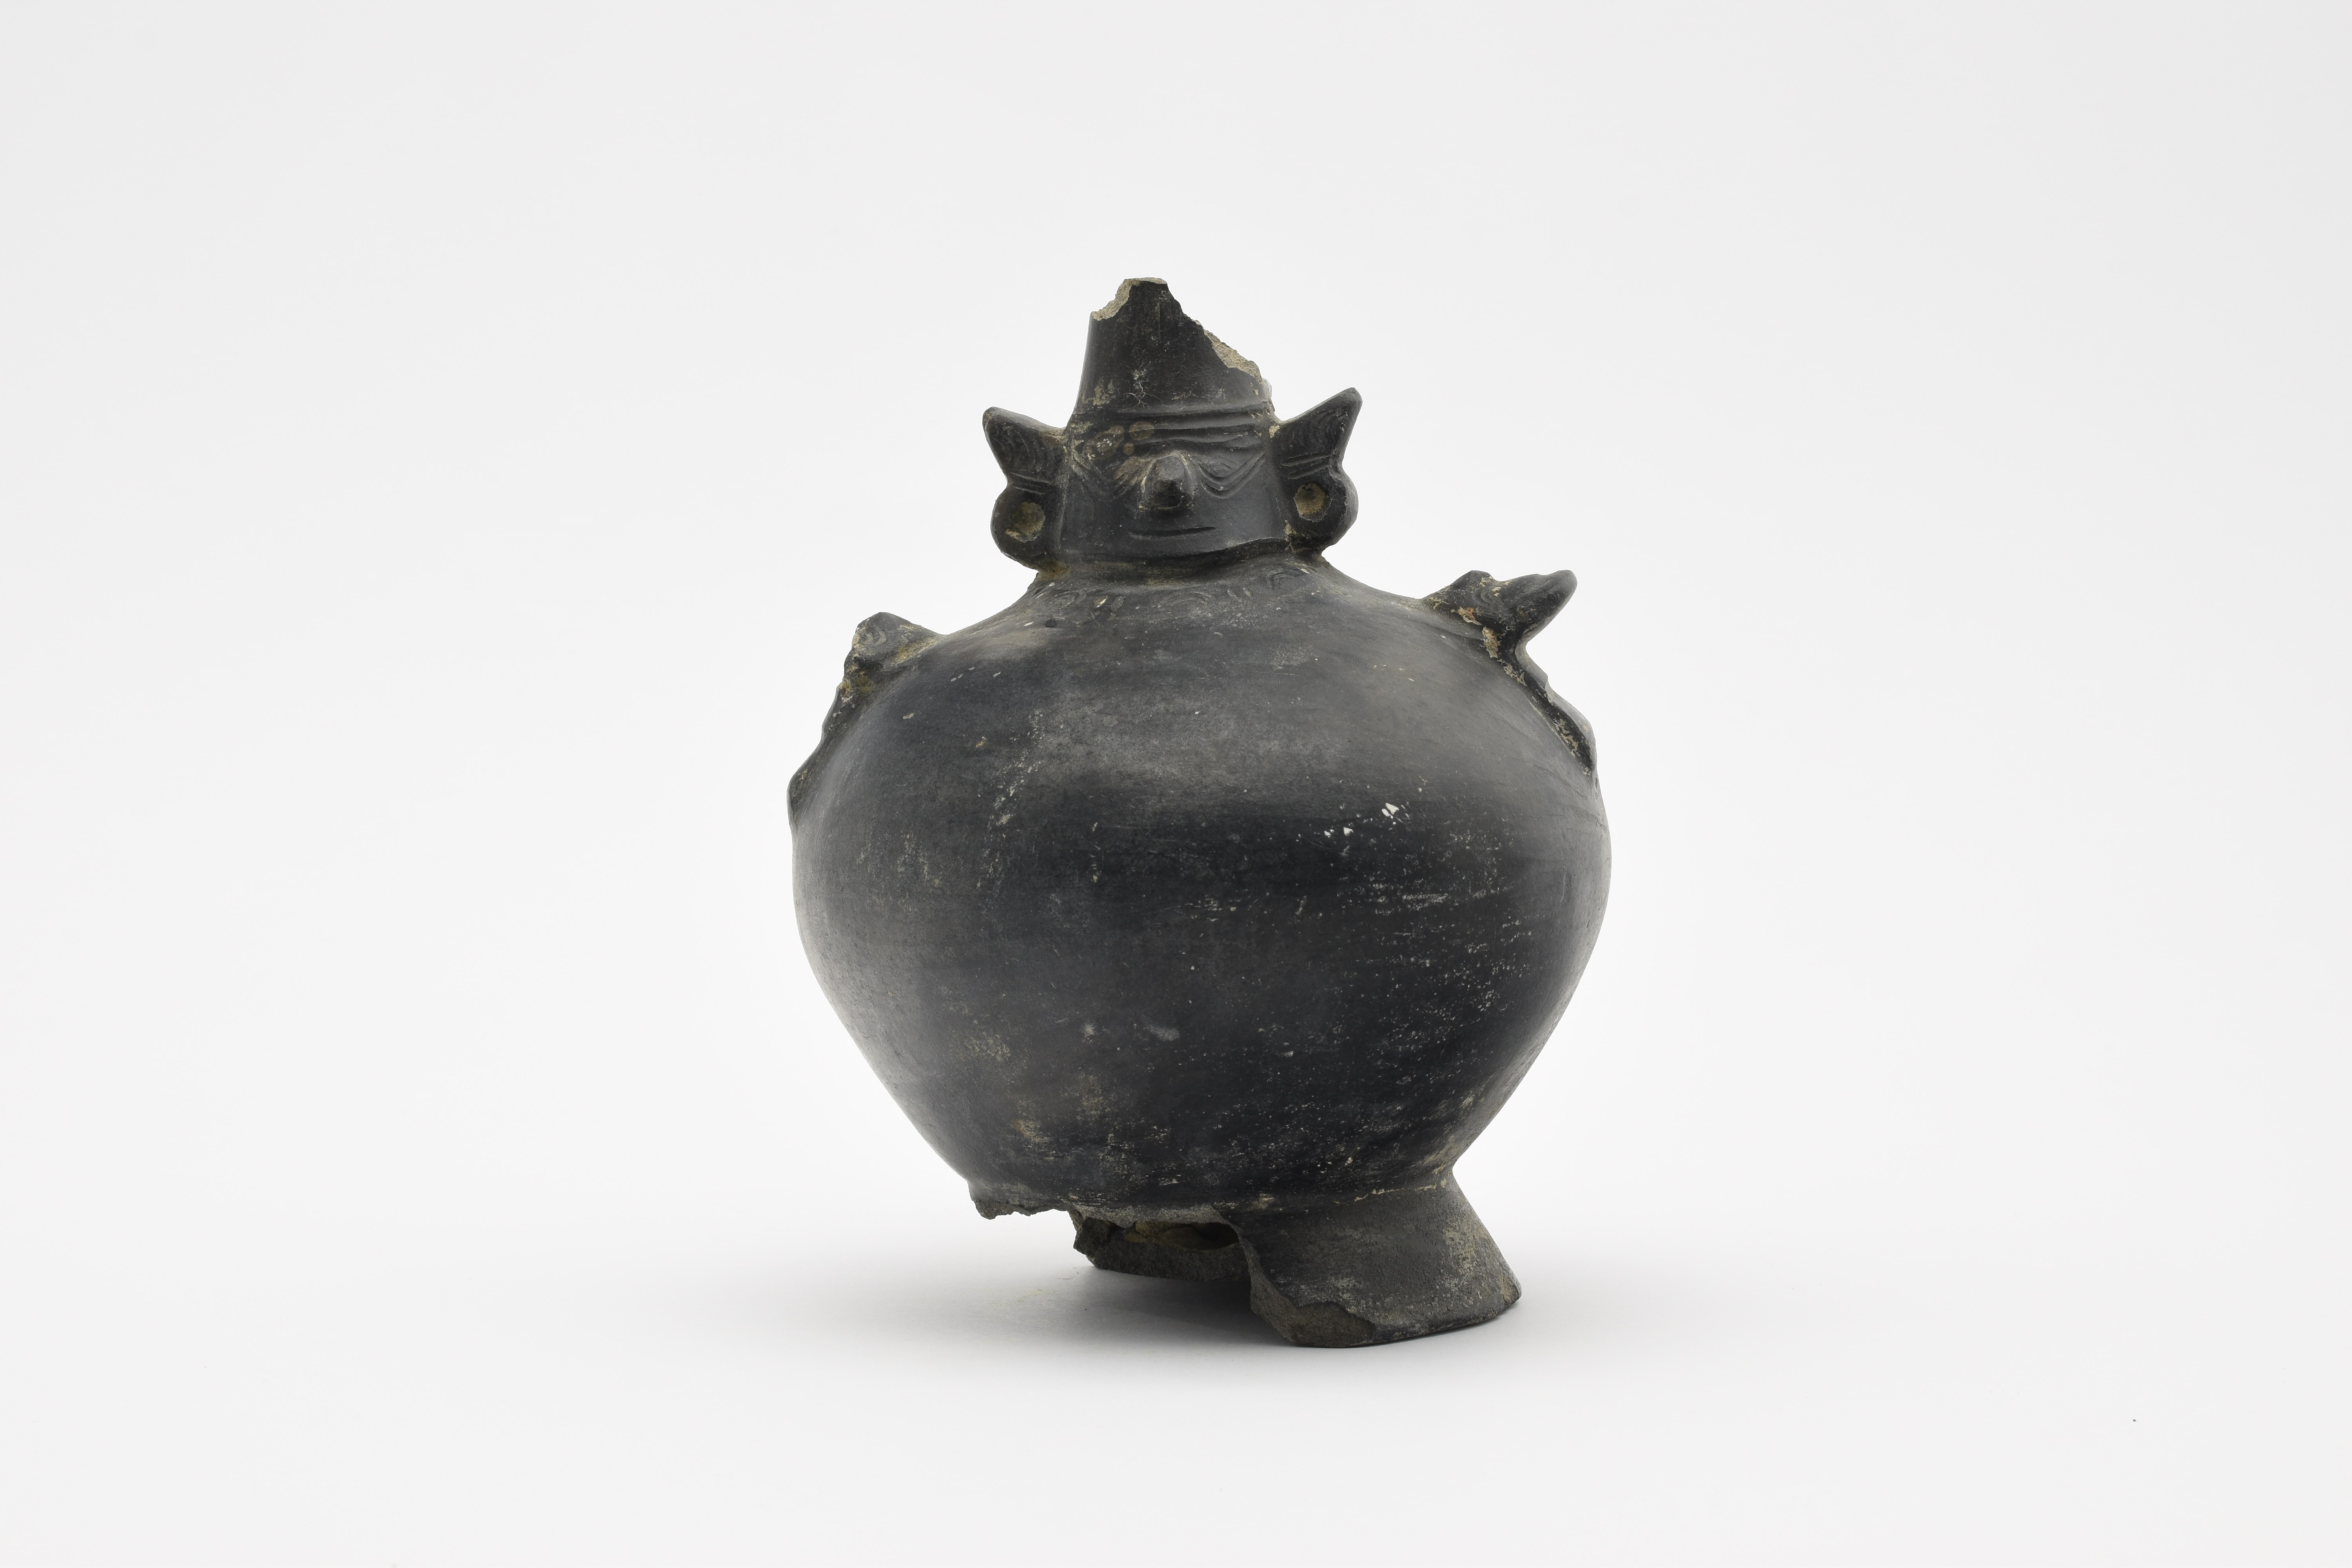

# EN EFECTO, AMBOS HACEN REFERENCIA A BOTELLAS, MOLDEADAS E INCOMPLETAS

# ***PASO 16*** INDAGAREMOS MEDIANTE ANÁLISIS CON K-MEANS PARA CORROBORAR SI LAS AGRUPACIONES SON SIMILARES

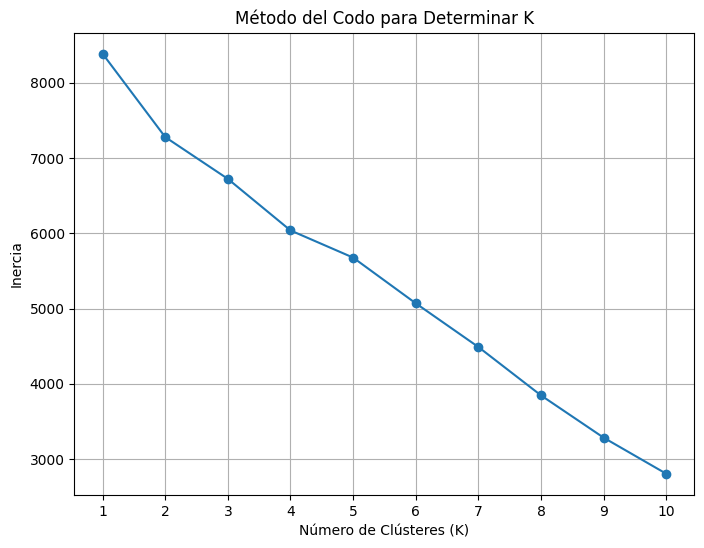

In [ ]:
# PRIMERO, REALIZAMOS EL MÉTODO DEL CODO PARA SABER QUÉ AGRUPACIÓN ES LA MÁS CONVENIENTE

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(final_filter_df)

from sklearn.cluster import KMeans
import numpy as np

inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, marker='o')
plt.title('Método del Codo para Determinar K')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

SEGÚN LO QUE MUESTRA EL GRÁFICO, TENEMOS UN CODO POCO DEFINIDO, CON UNA CURVA BASTANTE LINEAL A DECIR VERDAD, ESTO QUIZÁS HACE REFERENCIA A QUE LOS DATOS SON MUY VARIADOS TENIENDO UNA ESTRUCTURA CASI COTINUA, POR LO QUE PODRÍAMOS TOMAR EL K=3 o el K=4 YA QUE PARECE EXISTIR UN QUIEBRE HACIA ESOS VALORES

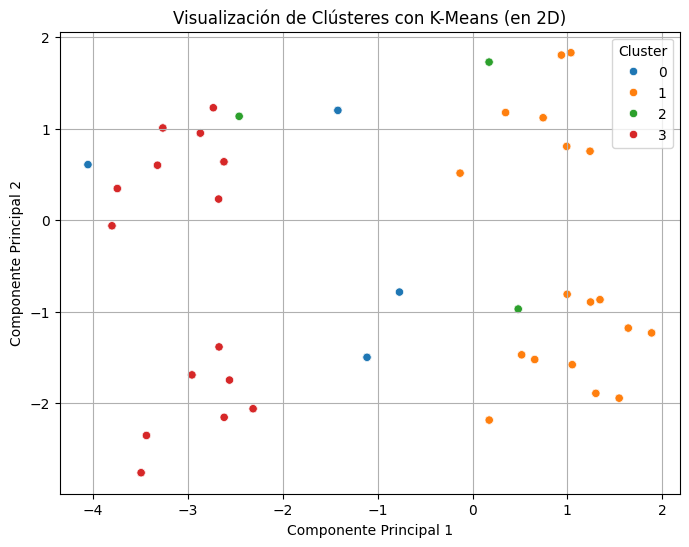

In [ ]:
# REALIZAREMOS EL ANÁLISIS CON K-MEANS PARA VER SI LA CANTIDAD DE AGRUPACIONES SON SIMILARES A LAS REALIZADAS CON EL DBSCAN, EN ESTA OCASIÓN USAREMOS EL K=4

import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_filter_df)

k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans.fit(X_scaled)

final_filter_df['Cluster_KMeans'] = kmeans.labels_

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='tab10')
plt.title('Visualización de Clústeres con K-Means (en 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


SI PRESTAMOS ATENCIÓN, LA DISTRIBUCIÓN DE LOS CLUSTERES, ES MUY SIMILAR A LA OBSERVADA SEGÚN EL ANÁLISIS DEL DBSCAN

# ***PASO 17*** MOSTRAMOS EN NÚMEROS EL ANÁLISIS DEL K-MEANS

In [ ]:
# LA AGRUPACIÓN EN LISTA DE LOS DATOS ES LA SIGUIENTE:

final_filter_df.groupby('Cluster_KMeans').mean()

,Tipo de Objeto_Botella,Tipo de Objeto_Cántaro,Tipo de Objeto_Escultura,Tipo de Objeto_Jarra,Tipo de Objeto_Miniatura,Tipo de Objeto_Olla,Tipo de Objeto_Piruro,Tipo de Objeto_Plato,Tipo de Objeto_Silbato,Técnica de Manufactura_Modelado,Técnica de Manufactura_Moldeado,"Técnica de Manufactura_Moldeado, Modelado",Estado de Integridad_Completo,Estado de Integridad_Fragmento,Estado de Integridad_Incompleto
Cluster_KMeans,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,1.0,0.0,0.00000,0.000000,0.000000,0.000000,0.933333,0.066667,0.00,0.666667,0.033333,0.300000
1,0.111111,0.149871,0.064599,0.0,0.0,0.29199,0.077519,0.250646,0.054264,1.000000,0.000000,0.00,0.596899,0.064599,0.338501
2,0.000000,0.000000,0.000000,0.0,1.0,0.00000,0.000000,0.000000,0.000000,0.952381,0.047619,0.00,0.857143,0.000000,0.142857
3,0.510000,0.300000,0.050000,0.0,0.0,0.13000,0.000000,0.000000,0.010000,0.000000,0.380000,0.62,0.690000,0.010000,0.300000


In [107]:
# REALIZAREMOS UNA SEPARACIÓN DE LAS VARIABLES CATEGÓRICAS POR CADA CLUSTER, DE TAL MANERA QUE SE TENGA UNA MEJOR IDEA DE CÓMO SE DISTRIBUYEN LAS PIEZAS

categoricas = ['Tipo de Objeto_Botella', 'Tipo de Objeto_Cántaro', 'Tipo de Objeto_Escultura', 'Tipo de Objeto_Jarra', 'Tipo de Objeto_Miniatura', 'Tipo de Objeto_Olla', 'Tipo de Objeto_Piruro', 'Tipo de Objeto_Plato', 'Tipo de Objeto_Silbato', 'Técnica de Manufactura_Modelado', 'Técnica de Manufactura_Moldeado', 'Técnica de Manufactura_Moldeado, Modelado', 'Estado de Integridad_Completo', 'Estado de Integridad_Fragmento', 'Estado de Integridad_Incompleto']

for col in categoricas:
    print(f"\nDistribución de '{col}' por clúster:")
    print(final_filter_df.groupby('Cluster_KMeans')[col].value_counts(normalize=True).unstack().fillna(0))


Distribución de 'Tipo de Objeto_Botella' por clúster:
Tipo de Objeto_Botella     False     True 
Cluster_KMeans                            
0                       1.000000  0.000000
1                       0.888889  0.111111
2                       1.000000  0.000000
3                       0.490000  0.510000

Distribución de 'Tipo de Objeto_Cántaro' por clúster:
Tipo de Objeto_Cántaro     False     True 
Cluster_KMeans                            
0                       1.000000  0.000000
1                       0.850129  0.149871
2                       1.000000  0.000000
3                       0.700000  0.300000

Distribución de 'Tipo de Objeto_Escultura' por clúster:
Tipo de Objeto_Escultura     False     True 
Cluster_KMeans                              
0                         1.000000  0.000000
1                         0.935401  0.064599
2                         1.000000  0.000000
3                         0.950000  0.050000

Distribución de 'Tipo de Objeto_Jarra' por clú